In [3]:
import sys
print(sys.executable)
from utils import *
import matplotlib.ticker as plticker

/Users/clivian/opt/anaconda3/bin/python


In [2]:
# daily_ratings, movie_ratings = loadDic()
daily_ratings, movie_ratings = loadDic()

In [3]:
# mostPop(daily_ratings, 62423, sys.maxsize)

In [4]:
temp_mkeys = mostPop(daily_ratings, 20, (2019, 1, 1))
temp_mtitles = getMovieTitleById(temp_mkeys)
temp_mkeys

['Star Wars: Episode IV - A New Hope (1977)', 'Pulp Fiction (1994)', 'Shawshank Redemption, The (1994)', 'Forrest Gump (1994)', "Schindler's List (1993)", 'Silence of the Lambs, The (1991)', 'Godfather, The (1972)', 'Star Wars: Episode V - The Empire Strikes Back (1980)', 'Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)', 'Matrix, The (1999)', 'American Beauty (1999)', 'Fight Club (1999)', 'Lord of the Rings: The Fellowship of the Ring, The (2001)', 'Lord of the Rings: The Two Towers, The (2002)', 'Lord of the Rings: The Return of the King, The (2003)', 'Dark Knight, The (2008)', 'WALL·E (2008)', 'Up (2009)', 'Avatar (2009)', 'Inception (2010)']


[2571,
 79132,
 318,
 58559,
 2959,
 356,
 7153,
 4993,
 296,
 5952,
 260,
 593,
 72998,
 1196,
 68954,
 527,
 858,
 1198,
 60069,
 2858]

In [5]:
time_dic = {
    2015:[(2014, 11), (2014, 12)] + ([(2015, m) for m in range(1, 11)]),
    2016:[(2015, 11), (2015, 12)] + ([(2016, m) for m in range(1, 11)]),
    2017:[(2016, 11), (2016, 12)] + ([(2017, m) for m in range(1, 11)]),
    2018:[(2017, 11), (2017, 12)] + ([(2018, m) for m in range(1, 11)]),
    2019:[(2018, 11), (2018, 12)] + ([(2019, m) for m in range(1, 11)])
}

In [6]:
def getRPrecision(params):
    delta_t_list = params['delta_t']
    day_aves = []
    for delta_t in delta_t_list:
        day_ave = {}
        for _year in range(2015, 2020):
            day_count = 0
            for year, month in time_dic[_year]:
                for day in range(1, 32):
                    date = (year, month, day)
                    if daily_ratings.get(date, -1) == -1:
                        print('date', date, 'invalid')
                        continue
                    day_count += 1
                    user_activities = getUserActivities(daily_ratings[date])
                    max_R = getMaxR(user_activities)
                    day_recentPop = day_decayPop = delta_t
                    
                    max_R_mostPop, max_R_recentPop, max_R_decayPop = (
                        mostPop(daily_ratings, max_R, date),
                        recentPop(daily_ratings, max_R, date, day_recentPop),
                        decayPop(daily_ratings, max_R, date, day_decayPop)
                    )

                    mostPop_cur, recentPop_cur, decayPop_cur = (
                        RPrecision(user_activities, max_R_mostPop),
                        RPrecision(user_activities, max_R_recentPop),
                        RPrecision(user_activities, max_R_decayPop)
                    )
                    
                    day_ave[date] = [mostPop_cur, recentPop_cur, decayPop_cur]
        day_aves.append(day_ave)
    return day_aves

In [7]:
# start = time.time() 
params = {}
# params['delta_t'] = [1, 2]
params['delta_t'] = [1, 2, 4, 8, 16, 32]

In [8]:
# only need to uncomment if intend to rerun the evaluation
# day_aves = getRPrecision(params)
# np.save(os.path.join('data', 'day_aves.npy'), day_aves)
# end = time.time()
# elapse = end - start
# print(elapse)

In [51]:
day_aves = np.load(os.path.join('data', 'day_aves.npy'), allow_pickle=True).tolist()
month_aves = []
year_aves = []
weekday_pattern = []
monthly_pattern = []
yearly_pattern = []
for method in range(0, 3):
    year_ave_per_method = []
    month_ave_per_method = []
    weekday_pattern_per_method = [[] for i in range(7)]
    monthly_pattern_per_method = [[] for i in range(12)]
    yearly_pattern_per_method = [[] for i in range(5)]
    for day_ave in day_aves:
        year_ave_per_param = []
        month_ave_per_param = []
        for _year in range(2015, 2020):
            year_value = []
            for year, month in time_dic[_year]:
                month_value = []
                for day in range(1, 32):
                    value = day_ave.get((year, month, day), -1)
                    if value != -1:
                        month_value.append(value[method])
                        year_value.append(value[method])
                        if day_ave == day_aves[2] and (method == 1 or method == 0): # deltat = 4
                            weekday = datetime.date(year, month, day).weekday()
                            weekday_pattern_per_method[weekday].append(value[method])
                            monthly_pattern_per_method[month - 1].append(value[method])
                            yearly_pattern_per_method[_year - 2015].append(value[method])
                        if day_ave == day_aves[3] and method == 2: # deltat = 8
                            weekday = datetime.date(year, month, day).weekday()
                            weekday_pattern_per_method[weekday].append(value[method])
                            monthly_pattern_per_method[month - 1].append(value[method])
                            yearly_pattern_per_method[_year - 2015].append(value[method])
                month_ave_per_param.append(sum(month_value) / len(month_value) * 100)
            year_ave_per_param.append("%.3f" % (sum(year_value) / len(year_value) * 100))
        year_ave_per_method.append(year_ave_per_param)
        month_ave_per_method.append(month_ave_per_param)
    year_aves.append(year_ave_per_method)
    month_aves.append(month_ave_per_method)
    weekday_pattern.append([(sum(v) / len(v) * 100) for v in weekday_pattern_per_method])
    monthly_pattern.append([(sum(v) / len(v) * 100) for v in monthly_pattern_per_method])
    yearly_pattern.append([(sum(v) / len(v) * 100) for v in yearly_pattern_per_method])
methods = ['mostPop', 'recentPop', 'decayPop']
colors = ['r', 'b', 'g', 'c', 'm', 'y']

In [52]:
yearly_count = [0] * 5
monthly_count = [0] * 12
weekday_count = [0] * 7
yearly_new_movie = [0] * 5
monthly_new_movie = [0] * 12
weekday_new_movie = [0] * 7
yearly_active_user = [0] * 5
monthly_active_user = [0] * 12
weekday_active_user = [0] * 7
existing_movie = set()

for year in range(2009, 2014):
    for month in range(1, 13):
        for day in range(1, 32):
            ratings = daily_ratings.get((year, month, day), -1)
            if ratings != -1:
                for movie in ratings:
                    existing_movie.add(movie)
for year in range(2014, 2015):
    for month in range(1, 11):
        for day in range(1, 32):
            ratings = daily_ratings.get((year, month, day), -1)
            if ratings != -1:
                for movie in ratings:
                    existing_movie.add(movie)


for _year in range(2015, 2020):
    year_active_user = set()
    for year, month in time_dic[_year]:
        month_active_user = set()
        for day in range(1, 32):
            day_active_user = set()
            ratings = daily_ratings.get((year, month, day), -1)
            if ratings != -1:
                for movie in ratings:
                    for user in ratings[movie]:
                        year_active_user.add(user)
                        month_active_user.add(user)
                        day_active_user.add(user)
                weekday = datetime.date(year, month, day).weekday()
            weekday_active_user[weekday] += len(day_active_user)
        monthly_active_user[month - 1] += len(month_active_user)
    yearly_active_user[_year - 2015] += len(year_active_user)

for _year in range(2015, 2020):
    for year, month in time_dic[_year]:
        for day in range(1, 32):
            ratings = daily_ratings.get((year, month, day), -1)
            if ratings != -1: 
                weekday = datetime.date(year, month, day).weekday()
                new_movie_count = 0
                for movie in ratings:
                    yearly_count[_year - 2015] += len(ratings[movie])
                    monthly_count[month - 1] += len(ratings[movie])
                    weekday_count[weekday] += len(ratings[movie])
                    if movie not in existing_movie:
                        existing_movie.add(movie)
                        new_movie_count += 1
                yearly_new_movie[_year - 2015] += new_movie_count
                monthly_new_movie[month - 1] += new_movie_count
                weekday_new_movie[weekday] += new_movie_count            
print(sum(yearly_count))
print(sum(monthly_count))
print(sum(weekday_count))
print(sum(yearly_new_movie))
print(sum(monthly_new_movie))
print(sum(weekday_new_movie))
print(yearly_count)
print(monthly_count)
print(weekday_count)
print(yearly_new_movie)
print(monthly_new_movie)
print(weekday_new_movie)

7630991
7630991
7630991
37425
37425
37425
[1316430, 1932026, 1708760, 1278670, 1395105]
[691612, 604051, 643229, 582075, 677054, 548120, 665809, 672548, 630118, 626252, 671689, 618434]
[1267195, 1039968, 1007036, 951743, 918295, 1135754, 1311000]
[6886, 8067, 7427, 7122, 7923]
[3026, 3431, 2924, 2668, 4223, 2626, 3057, 3562, 3070, 3067, 2726, 3045]
[5944, 5135, 5002, 5276, 4113, 6185, 5770]


<ipython-input-53-28579c263e7a>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(year_x)


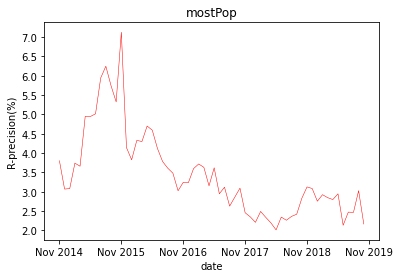

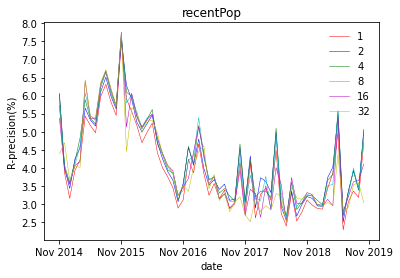

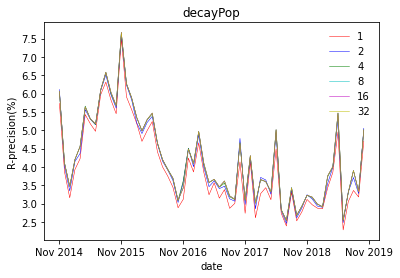

In [53]:
# plot monthly average
year_x = ['']
for year in range(2014, 2020):
    year_x.append('Nov ' + str(year))
year_x[0] = 'Nov 2014'
temp_x = [i for i in range(0, 60)]
for i in range(0, len(methods)):
    fig, ax = plt.subplots()
    x_loc = plticker.MultipleLocator(base=12)
    y_loc = plticker.MultipleLocator(base=0.5)
    ax.xaxis.set_major_locator(x_loc)
    ax.yaxis.set_major_locator(y_loc)
    ax.set_title(str(methods[i]), loc='center')
    if methods[i] == 'mostPop':
        param = params['delta_t'][0]
        ax.plot(temp_x, month_aves[i][0], color=colors[0], linewidth=0.5)
    else:
        for j in range(0, len(params['delta_t'])):
            param = params['delta_t'][j]
            ax.plot(temp_x, month_aves[i][j], color=colors[j], linewidth=0.5, label=str(param))
        ax.legend(loc='upper right', frameon=False)
    ax.set_xticklabels(year_x)
    ax.set_xlabel('date')
    ax.set_ylabel('R-precision(%)' )
    fig.savefig('./figures/monthly_average_' + str(methods[i]), bbox_inches='tight', dpi=300)

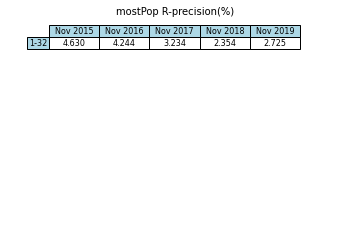

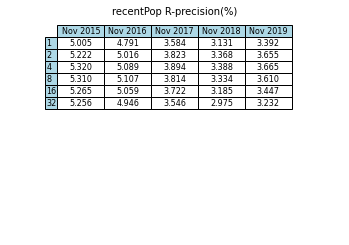

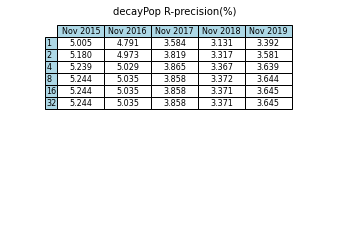

In [54]:
# plot yearly average
for i in range(0, len(methods)):
    fig, ax = plt.subplots() 
    ax.set_axis_off() 
    ax.set_title(str(methods[i]) + ' R-precision(%)', loc='center', fontsize=10)
    if methods[i] == 'mostPop':        
        table = ax.table(
            cellText = [year_aves[i][0]],
            colLabels = ['Nov ' + str(year) for year in range(2015, 2021)],
            rowLabels = ['1-32'],
            rowColours = ["lightblue"] * 1,  
            colColours = ["lightblue"] * len(year_aves[i][0]), 
            colWidths = [0.15] * len(year_aves[i][0]),
            cellLoc = 'center',
            loc = 'upper center',
        )
    else:
        table = ax.table(
            cellText = year_aves[i],
            rowLabels = params['delta_t'],
            colLabels = ['Nov ' + str(year) for year in range(2015, 2021)],
            rowColours = ["lightblue"] * len(year_aves[i]),  
            colColours = ["lightblue"] * len(year_aves[i][0]), 
            colWidths= [0.14] * len(year_aves[i][0]),
            cellLoc ='center',
            loc ='upper center',
        )
    bbox = table.get_window_extent(fig.canvas.get_renderer())
    bbox = bbox.from_extents(bbox.xmin-5, bbox.ymin-5, bbox.xmax+5, bbox.ymax+25)
    bbox_inches = bbox.transformed(fig.dpi_scale_trans.inverted())
    fig.savefig('./figures/yearly_average_' + str(methods[i]), bbox_inches=bbox_inches, dpi=300)
    

<ipython-input-55-b7e7645df7f6>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['', 'Mon.', 'Tue.', 'Wed.', 'Thu.', 'Fri.', 'Sat.', 'Sun.'])
<ipython-input-55-b7e7645df7f6>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['', 'Mon.', 'Tue.', 'Wed.', 'Thu.', 'Fri.', 'Sat.', 'Sun.'])
<ipython-input-55-b7e7645df7f6>:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['', 'Mon.', 'Tue.', 'Wed.', 'Thu.', 'Fri.', 'Sat.', 'Sun.'])
<ipython-input-55-b7e7645df7f6>:54: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['', 'Mon.', 'Tue.', 'Wed.', 'Thu.', 'Fri.', 'Sat.', 'Sun.'])


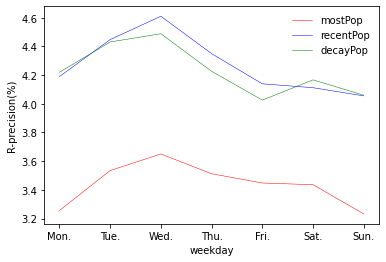

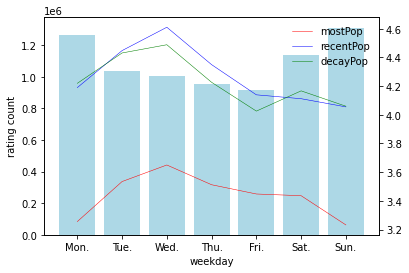

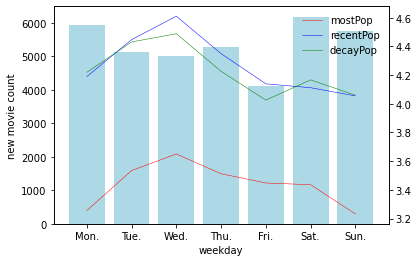

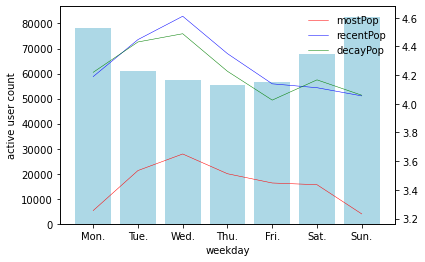

In [55]:
# weekday_pattern
fig, ax = plt.subplots()
temp_x = [i for i in range(7)]
x_loc = plticker.MultipleLocator(base=1)
y_loc = plticker.MultipleLocator(base=0.2)
ax.xaxis.set_major_locator(x_loc)
ax.yaxis.set_major_locator(y_loc)
# ax.set_title('weekday pattern', loc='center')
for i in range(3):
    ax.plot(temp_x,
            weekday_pattern[i],
            color=colors[i], linewidth=0.5, label = methods[i])
ax.set_xticklabels(['', 'Mon.', 'Tue.', 'Wed.', 'Thu.', 'Fri.', 'Sat.', 'Sun.'])
ax.legend(loc='upper right', frameon=False)
ax.set_xlabel('weekday')
ax.set_ylabel('R-precision(%)')
fig.savefig('./figures/weekday_pattern', bbox_inches='tight', dpi=300)

fig, ax = plt.subplots()
# ax.set_title('weekday count', loc='center')
ax.bar(temp_x, weekday_count, color='lightblue')
ax.set_xticklabels(['', 'Mon.', 'Tue.', 'Wed.', 'Thu.', 'Fri.', 'Sat.', 'Sun.'])
ax.set_xlabel('weekday')
ax.set_ylabel('rating count')
ax2 = ax.twinx()
ax2.xaxis.set_major_locator(x_loc)
ax2.yaxis.set_major_locator(y_loc)
for i in range(3):
    ax2.plot(temp_x,
            weekday_pattern[i],
            color=colors[i], linewidth=0.5, label = methods[i])
ax2.legend(loc='upper right', frameon=False)
fig.savefig('./figures/weekday_count', bbox_inches='tight', dpi=300)

fig, ax = plt.subplots()
# ax.set_title('weekday new movie', loc='center')
ax.bar(temp_x, weekday_new_movie, color='lightblue')
ax.set_xticklabels(['', 'Mon.', 'Tue.', 'Wed.', 'Thu.', 'Fri.', 'Sat.', 'Sun.'])
ax.set_xlabel('weekday')
ax.set_ylabel('new movie count')
ax2 = ax.twinx()
ax2.xaxis.set_major_locator(x_loc)
ax2.yaxis.set_major_locator(y_loc)
for i in range(3):
    ax2.plot(temp_x,
            weekday_pattern[i],
            color=colors[i], linewidth=0.5, label = methods[i])
ax2.legend(loc='upper right', frameon=False)
fig.savefig('./figures/weekday_new_movie', bbox_inches='tight', dpi=300)

fig, ax = plt.subplots()
# ax.set_title('weekday active user', loc='center')
ax.bar(temp_x, weekday_active_user, color='lightblue')
ax.set_xticklabels(['', 'Mon.', 'Tue.', 'Wed.', 'Thu.', 'Fri.', 'Sat.', 'Sun.'])
ax.set_xlabel('weekday')
ax.set_ylabel('active user count')
ax2 = ax.twinx()
ax2.xaxis.set_major_locator(x_loc)
ax2.yaxis.set_major_locator(y_loc)
for i in range(3):
    ax2.plot(temp_x,
            weekday_pattern[i],
            color=colors[i], linewidth=0.5, label = methods[i])
ax2.legend(loc='upper right', frameon=False)
fig.savefig('./figures/weekday_active_user', bbox_inches='tight', dpi=300)

<ipython-input-56-fab120082155>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['', 'Jan.', 'Feb.', 'Mar.', 'Apr.', 'May.', 'Jun.', 'Jul.',
<ipython-input-56-fab120082155>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['', 'Jan.', 'Feb.', 'Mar.', 'Apr.', 'May.', 'Jun.', 'Jul.',
<ipython-input-56-fab120082155>:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['', 'Jan.', 'Feb.', 'Mar.', 'Apr.', 'May.', 'Jun.', 'Jul.',
<ipython-input-56-fab120082155>:63: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['', 'Jan.', 'Feb.', 'Mar.', 'Apr.', 'May.', 'Jun.', 'Jul.',


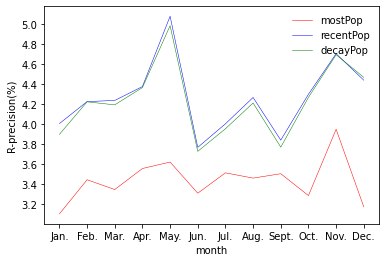

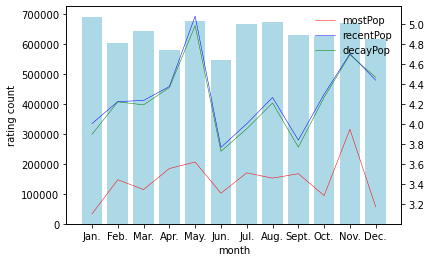

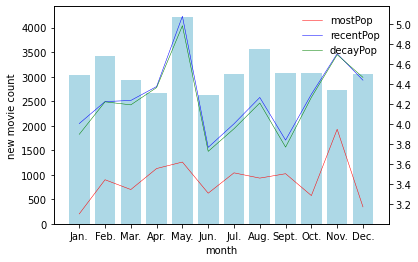

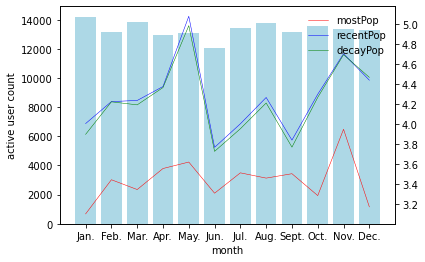

In [56]:
# monthly_pattern
fig, ax = plt.subplots()
temp_x = [i for i in range(12)]
x_loc = plticker.MultipleLocator(base=1)
y_loc = plticker.MultipleLocator(base=0.2)
ax.xaxis.set_major_locator(x_loc)
ax.yaxis.set_major_locator(y_loc)
# ax.set_title('monthly pattern', loc='center')
for i in range(3):
    ax.plot(temp_x,
            monthly_pattern[i],
            color=colors[i], linewidth=0.5, label = methods[i])
ax.set_xticklabels(['', 'Jan.', 'Feb.', 'Mar.', 'Apr.', 'May.', 'Jun.', 'Jul.', 
                    'Aug.', 'Sept.', 'Oct.', 'Nov.', 'Dec.'])
ax.legend(loc='upper right', frameon=False)
ax.set_xlabel('month')
ax.set_ylabel('R-precision(%)' )
fig.savefig('./figures/monthly_pattern', bbox_inches='tight', dpi=300)

fig, ax = plt.subplots()
# ax.set_title('monthly count', loc='center')
x_loc = plticker.MultipleLocator(base=1)
ax.xaxis.set_major_locator(x_loc)
ax.bar(temp_x, monthly_count, color='lightblue')
ax.set_xticklabels(['', 'Jan.', 'Feb.', 'Mar.', 'Apr.', 'May.', 'Jun.', 'Jul.', 
                    'Aug.', 'Sept.', 'Oct.', 'Nov.', 'Dec.'])
ax.set_xlabel('month')
ax.set_ylabel('rating count')
ax2 = ax.twinx()
ax2.xaxis.set_major_locator(x_loc)
ax2.yaxis.set_major_locator(y_loc)
for i in range(3):
    ax2.plot(temp_x,
            monthly_pattern[i],
            color=colors[i], linewidth=0.5, label = methods[i])
ax2.legend(loc='upper right', frameon=False)
fig.savefig('./figures/monthly_count', bbox_inches='tight', dpi=300)

fig, ax = plt.subplots()
# ax.set_title('monthly new movie', loc='center')
x_loc = plticker.MultipleLocator(base=1)
ax.xaxis.set_major_locator(x_loc)
ax.bar(temp_x, monthly_new_movie, color='lightblue')
ax.set_xticklabels(['', 'Jan.', 'Feb.', 'Mar.', 'Apr.', 'May.', 'Jun.', 'Jul.', 
                    'Aug.', 'Sept.', 'Oct.', 'Nov.', 'Dec.'])
ax.set_xlabel('month')
ax.set_ylabel('new movie count')
ax2 = ax.twinx()
ax2.xaxis.set_major_locator(x_loc)
ax2.yaxis.set_major_locator(y_loc)
for i in range(3):
    ax2.plot(temp_x,
            monthly_pattern[i],
            color=colors[i], linewidth=0.5, label = methods[i])
ax2.legend(loc='upper right', frameon=False)
fig.savefig('./figures/monthly_new_movie', bbox_inches='tight', dpi=300)

fig, ax = plt.subplots()
# ax.set_title('monthly active user', loc='center')
x_loc = plticker.MultipleLocator(base=1)
ax.xaxis.set_major_locator(x_loc)
ax.bar(temp_x, monthly_active_user, color='lightblue')
ax.set_xticklabels(['', 'Jan.', 'Feb.', 'Mar.', 'Apr.', 'May.', 'Jun.', 'Jul.', 
                    'Aug.', 'Sept.', 'Oct.', 'Nov.', 'Dec.'])
ax.set_xlabel('month')
ax.set_ylabel('active user count')
ax2 = ax.twinx()
ax2.xaxis.set_major_locator(x_loc)
ax2.yaxis.set_major_locator(y_loc)
for i in range(3):
    ax2.plot(temp_x,
            monthly_pattern[i],
            color=colors[i], linewidth=0.5, label = methods[i])
ax2.legend(loc='upper right', frameon=False)
fig.savefig('./figures/monthly_active_user', bbox_inches='tight', dpi=300)

<ipython-input-57-6348ead92c7c>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['', '2015', '2016', '2017', '2018', '2019'])
<ipython-input-57-6348ead92c7c>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['', '2015', '2016', '2017', '2018', '2019'])
<ipython-input-57-6348ead92c7c>:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['', '2015', '2016', '2017', '2018', '2019'])
<ipython-input-57-6348ead92c7c>:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['', '2015', '2016', '2017', '2018', '2019'])


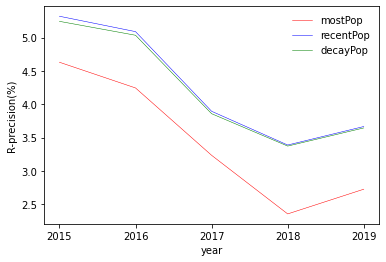

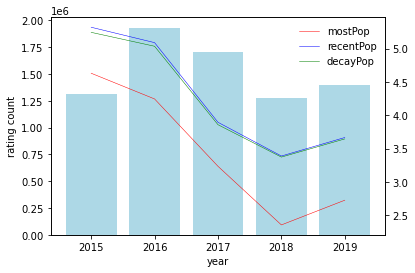

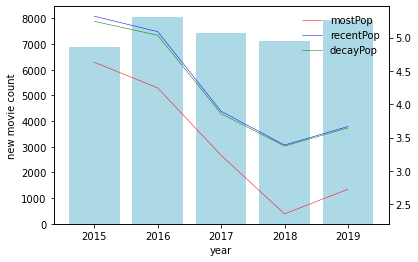

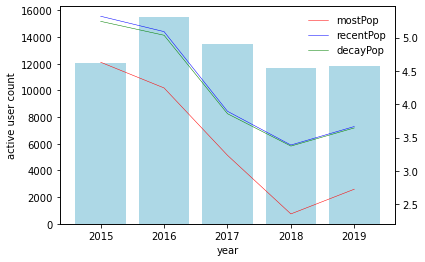

In [57]:
# yearly_pattern
fig, ax = plt.subplots()
temp_x = [i for i in range(5)]
x_loc = plticker.MultipleLocator(base=1)
y_loc = plticker.MultipleLocator(base=0.5)
ax.xaxis.set_major_locator(x_loc)
ax.yaxis.set_major_locator(y_loc)
# ax.set_title('yearly pattern', loc='center')
for i in range(3):
    ax.plot(temp_x,
            yearly_pattern[i],
            color=colors[i], linewidth=0.5, label = methods[i])
ax.set_xticklabels(['', '2015', '2016', '2017', '2018', '2019'])
ax.legend(loc='upper right', frameon=False)
ax.set_xlabel('year')
ax.set_ylabel('R-precision(%)' )
fig.savefig('./figures/yearly_pattern', bbox_inches='tight', dpi=300)

fig, ax = plt.subplots()
# ax.set_title('yearly count', loc='center')
ax.bar(temp_x, yearly_count, color='lightblue')
ax.set_xticklabels(['', '2015', '2016', '2017', '2018', '2019'])
ax.set_xlabel('year')
ax.set_ylabel('rating count')
ax2 = ax.twinx()
ax2.xaxis.set_major_locator(x_loc)
ax2.yaxis.set_major_locator(y_loc)
# ax.set_title('yearly pattern', loc='center')
for i in range(3):
    ax2.plot(temp_x,
            yearly_pattern[i],
            color=colors[i], linewidth=0.5, label = methods[i])
ax2.legend(loc='upper right', frameon=False)
fig.savefig('./figures/yearly_count', bbox_inches='tight', dpi=300)

fig, ax = plt.subplots()
# ax.set_title('yearly new movie', loc='center')
ax.bar(temp_x, yearly_new_movie, color='lightblue')
ax.set_xticklabels(['', '2015', '2016', '2017', '2018', '2019'])
ax.set_xlabel('year')
ax.set_ylabel('new movie count')
ax2 = ax.twinx()
ax2.xaxis.set_major_locator(x_loc)
ax2.yaxis.set_major_locator(y_loc)
# ax.set_title('yearly pattern', loc='center')
for i in range(3):
    ax2.plot(temp_x,
            yearly_pattern[i],
            color=colors[i], linewidth=0.5, label = methods[i])
ax2.legend(loc='upper right', frameon=False)
fig.savefig('./figures/yearly_new_movie', bbox_inches='tight', dpi=300)

fig, ax = plt.subplots()
# ax.set_title('yearly active user', loc='center')
ax.bar(temp_x, yearly_active_user, color='lightblue')
ax.set_xticklabels(['', '2015', '2016', '2017', '2018', '2019'])
ax.set_xlabel('year')
ax.set_ylabel('active user count')
ax2 = ax.twinx()
ax2.xaxis.set_major_locator(x_loc)
ax2.yaxis.set_major_locator(y_loc)
# ax.set_title('yearly pattern', loc='center')
for i in range(3):
    ax2.plot(temp_x,
            yearly_pattern[i],
            color=colors[i], linewidth=0.5, label = methods[i])
ax2.legend(loc='upper right', frameon=False)
fig.savefig('./figures/yearly_active_user', dpi=300)

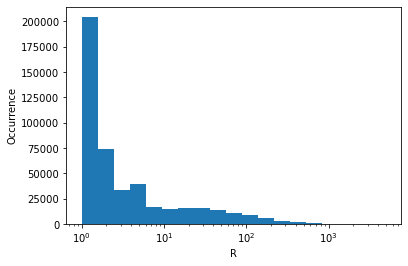

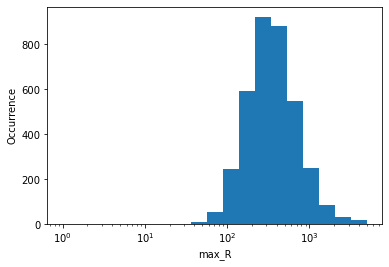

In [58]:
R_list = []
for _year in range(2015, 2020):
    for year, month in time_dic[_year]:
        for day in range(1, 32):
            date = (year, month, day)
            if daily_ratings.get(date, -1) == -1:
                continue
            user_activities = getUserActivities(daily_ratings[date])
            for user in user_activities:
                movies = user_activities[user]
                R_list.append(len(movies))
fig, ax = plt.subplots()
ax.hist(R_list, bins=np.logspace(np.log10(1),np.log10(5000), 20))
plt.xscale('log')
ax.set_xlabel('R')
ax.set_ylabel('occurrence' )
fig.savefig('./figures/R_pattern', bbox_inches='tight', dpi=300)

max_R_path = os.path.join('data', 'max_R_dic.npy')
max_R_dic = np.load(max_R_path, allow_pickle=True).item()
R_list = []
for day in max_R_dic:
    R_list.append(max_R_dic[day])
fig, ax = plt.subplots()
ax.hist(R_list, bins=np.logspace(np.log10(1),np.log10(5000), 20))
plt.xscale('log')
ax.set_xlabel('max_R')
ax.set_ylabel('occurrence' )
fig.savefig('./figures/max_R_pattern', bbox_inches='tight', dpi=300)

2738
52
cur_min 2
[[1.         0.7970419  0.78701136 ... 0.5601239  0.81108132 0.5888753 ]
 [0.7970419  1.         0.7640589  ... 0.57348928 0.77395638 0.6341026 ]
 [0.78701136 0.7640589  1.         ... 0.82751361 0.87604583 0.7384645 ]
 ...
 [0.5601239  0.57348928 0.82751361 ... 1.         0.83484619 0.6810881 ]
 [0.81108132 0.77395638 0.87604583 ... 0.83484619 1.         0.79945604]
 [0.5888753  0.6341026  0.7384645  ... 0.6810881  0.79945604 1.        ]]
5
1 1 2
2
[0, 0]
cur_min 3
[[1.         0.7970419  0.78701136 ... 0.5601239  0.81108132 0.5888753 ]
 [0.7970419  1.         0.7640589  ... 0.57348928 0.77395638 0.6341026 ]
 [0.78701136 0.7640589  1.         ... 0.82751361 0.87604583 0.7384645 ]
 ...
 [0.5601239  0.57348928 0.82751361 ... 1.         0.83484619 0.6810881 ]
 [0.81108132 0.77395638 0.87604583 ... 0.83484619 1.         0.79945604]
 [0.5888753  0.6341026  0.7384645  ... 0.6810881  0.79945604 1.        ]]
0
cur_min 4
[[1.         0.7970419  0.78701136 ... 0.5601239  0.811

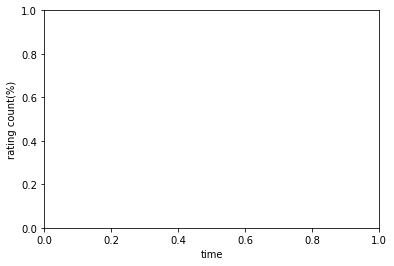

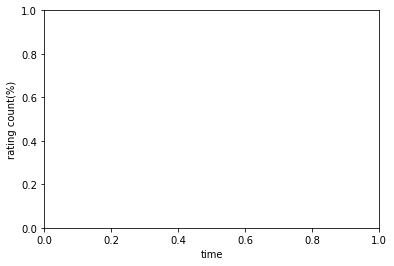

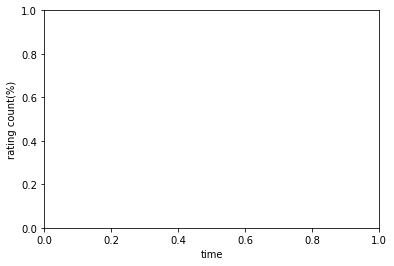

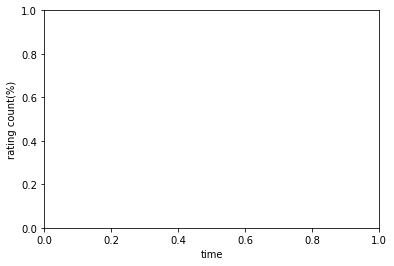

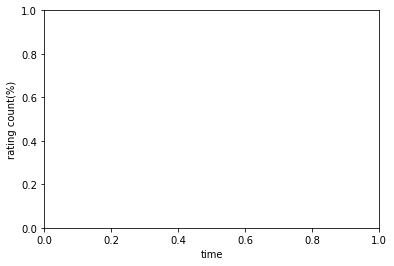

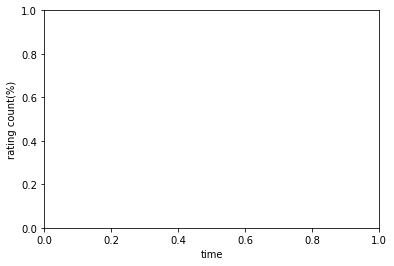

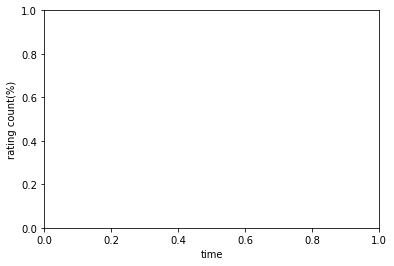

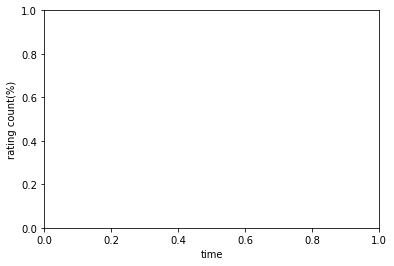

In [11]:
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine
from statistics import mode
# a = [1, 1, 1, 1, 1]
# b = [2, 2, 2, 2, 2]
# c = [1, 1, -1, -1, 0.1]
# d = [2, 2, -2, -2, 0.2]
# test2 = [a, b, c, d]
# dist_out = 1-pairwise_distances(test2, metric="cosine")
# clusterer = hdbscan.HDBSCAN(min_cluster_size=2)
# cluster_labels = clusterer.fit_predict(dist_out)
# print(dist_out)
# print(cluster_labels)
train_X = []
for movie in movie_timeline:
    timeline = movie_timeline[movie]
    start_index = 0
    while(timeline[start_index] == 0):
        start_index += 1
    one_year_since_release = timeline[start_index : start_index + 364]
    if len(one_year_since_release) == 364 and sum(one_year_since_release) >= 100:
        temp = []
        for i in range(0, 364, 7):
            temp.append(sum(one_year_since_release[i:i+7]) / 7)
        train_X.append([i for i in temp])        
#         train_X.append([i for i in one_year_since_release])
print(len(train_X))
print(len(train_X[0]))
for cur_min_samples in [2, 3, 4, 5, 6, 7, 8, 9, 10]:
    print('cur_min', cur_min_samples)
    dist_train_X =  1-pairwise_distances(train_X, metric="cosine")
    print(dist_train_X)
    cluster_model = hdbscan.HDBSCAN(min_cluster_size=cur_min_samples, metric='precomputed')
    res = cluster_model.fit_predict(dist_train_X)
    resl = [i for i in res.tolist() if i != -1]
    print(len(resl))
    if len(resl) != 0:
        mode_num = mode(resl)
        print(mode_num, max(resl), len(set(resl)))
        resll = [i for i in resl if i != mode_num]
        print(len(resll))
        print(resll)

dist_train_X =  1-pairwise_distances(train_X, metric="cosine")
cluster_model = hdbscan.HDBSCAN(min_cluster_size=6, metric='precomputed')
res = cluster_model.fit_predict(dist_train_X)
resl = [i for i in res.tolist() if i != -1]
print(len(resl))
if len(resl) != 0:
    mode_num = mode(resl)
    print(mode_num, max(resl), len(set(resl)))
    resll = [i for i in resl if i != mode_num]

clustered_timeline = [[], [], [], [], [], [], [], []]
results = res.tolist()
for i in range(len(train_X)):
    timeline = [item for item in train_X[i]]
    if res[i] != -1:
        clustered_timeline[res[i]].append(timeline)

for cluster_num in range(8):
    print(len(clustered_timeline[cluster_num]))
    fig, ax = plt.subplots()
    temp_x = [i for i in range(1, 365, 7)]
    for i in range(len(clustered_timeline[cluster_num])):
        ax.plot(temp_x,
                clustered_timeline[cluster_num][i],
                linewidth=0.5)
    ax.set_xlabel('time')
    ax.set_ylabel('rating count(%)' )


901
1 2 3
33
16
868
17
0
0
0
0
0


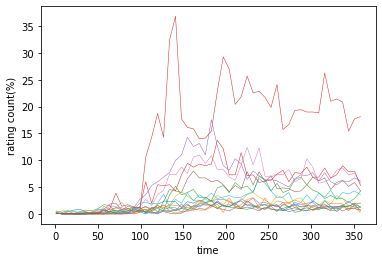

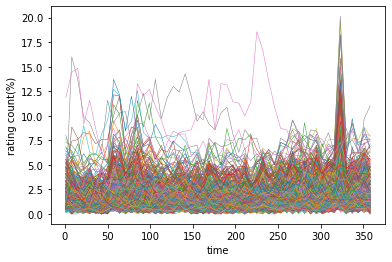

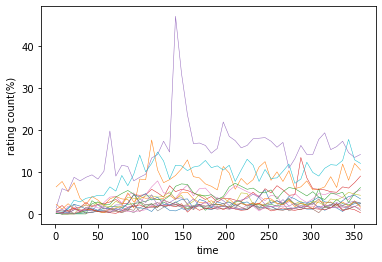

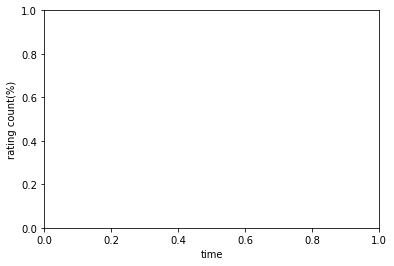

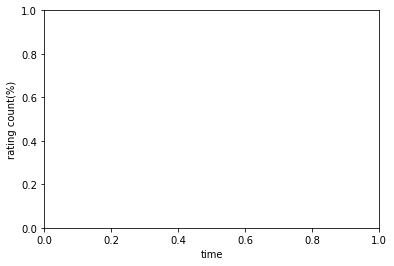

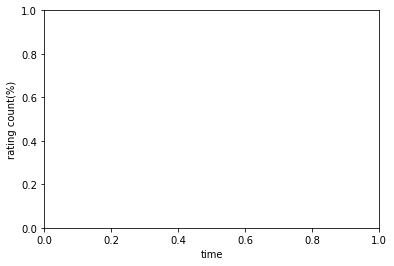

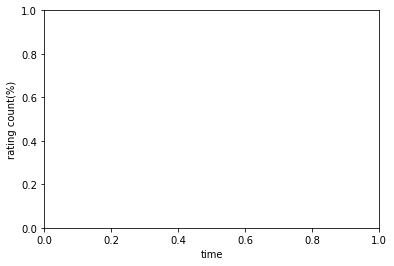

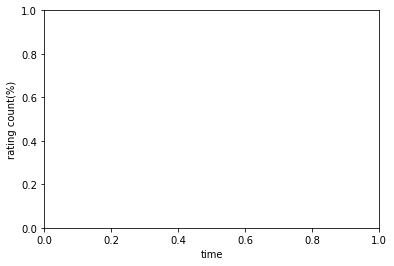

In [10]:
# from sklearn.metrics import pairwise_distances
# from scipy.spatial.distance import cosine
# from statistics import mode
# import hdbscan
# movie_timeline = np.load(os.path.join('data', 'movie_timeline.npy'), allow_pickle=True).tolist()

# # a = [1, 1, 1, 1, 1]
# # b = [2, 2, 2, 2, 2]
# # c = [1, 1, -1, -1, 0.1]
# # d = [2, 2, -2, -2, 0.2]
# # test2 = [a, b, c, d]
# # dist_out = 1-pairwise_distances(test2, metric="cosine")
# # clusterer = hdbscan.HDBSCAN(min_cluster_size=2)
# # cluster_labels = clusterer.fit_predict(dist_out)
# # print(dist_out)
# # print(cluster_labels)
# train_X = []
# for movie in movie_timeline:
#     timeline = movie_timeline[movie]
#     start_index = 0
#     while(timeline[start_index] == 0):
#         start_index += 1
#     one_year_since_release = timeline[start_index : start_index + 364]
#     if len(one_year_since_release) == 364 and sum(one_year_since_release) >= 100:
#         temp = []
#         for i in range(0, 364, 7):
#             temp.append(sum(one_year_since_release[i:i+7]) / 7)
#         train_X.append([i for i in temp])        
# #         train_X.append([i for i in one_year_since_release])
# print(len(train_X))
# print(len(train_X[0]))
# for cur_min_samples in [2, 3, 4, 5, 6, 7, 8, 9, 10]:
#     print('cur_min', cur_min_samples)
#     dist_train_X =  1-pairwise_distances(train_X, metric="cosine")
#     cluster_model = hdbscan.HDBSCAN(min_cluster_size=cur_min_samples)
#     res = cluster_model.fit_predict(dist_train_X)
#     resl = [i for i in res.tolist() if i != -1]
#     print(len(resl))
#     mode_num = mode(resl)
#     print(mode_num, max(resl), len(set(resl)))
#     resll = [i for i in resl if i != mode_num]
#     print(len(resll))
#     print(resll)

dist_train_X =  1-pairwise_distances(train_X, metric="cosine")
cluster_model = hdbscan.HDBSCAN(min_cluster_size=8)
res = cluster_model.fit_predict(dist_train_X)
resl = [i for i in res.tolist() if i != -1]
print(len(resl))
mode_num = mode(resl)
print(mode_num, max(resl), len(set(resl)))
resll = [i for i in resl if i != mode_num]
print(len(resll))


clustered_timeline = [[], [], [], [], [], [], [], []]
results = res.tolist()
for i in range(len(train_X)):
    timeline = [item for item in train_X[i]]
    if res[i] != -1:
        clustered_timeline[res[i]].append(timeline)

for cluster_num in range(8):
    print(len(clustered_timeline[cluster_num]))
    fig, ax = plt.subplots()
    temp_x = [i for i in range(1, 365, 7)]
    for i in range(len(clustered_timeline[cluster_num])):
        ax.plot(temp_x,
                clustered_timeline[cluster_num][i],
                linewidth=0.5)
    ax.set_xlabel('time')
    ax.set_ylabel('rating count(%)' )


307
2 4 5
8
7
270
14
8
0
0
0


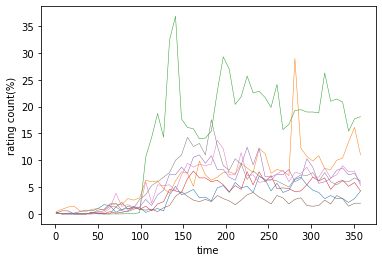

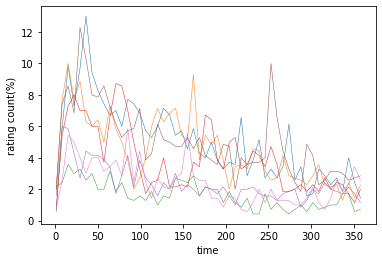

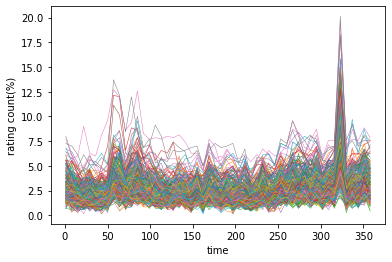

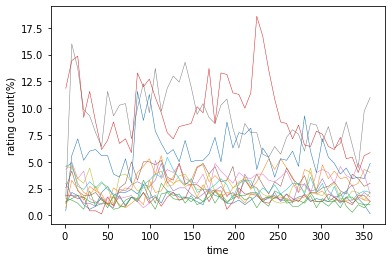

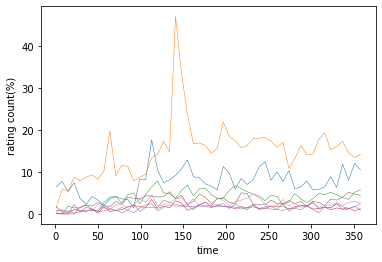

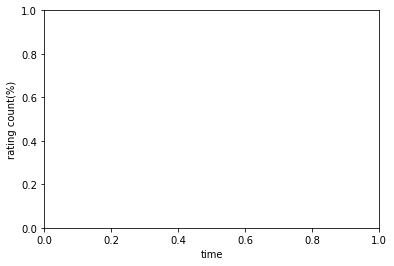

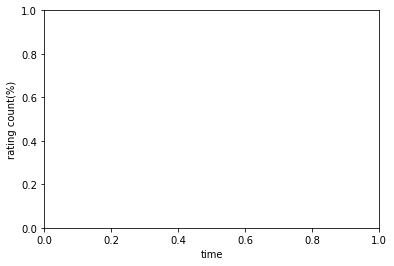

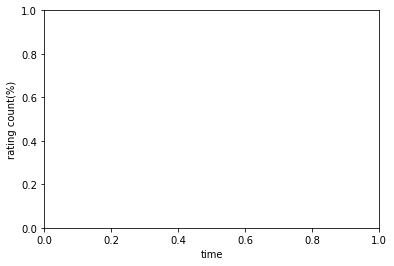

In [18]:
# train_X = []
# for movie in movie_timeline:
#     timeline = movie_timeline[movie]
#     start_index = 0
#     while(timeline[start_index] == 0):
#         start_index += 1
#     one_year_since_release = timeline[start_index : start_index + 364]
#     if len(one_year_since_release) == 364 and sum(one_year_since_release) >= 500:
#         temp = []
#         for i in range(0, 364, 7):
#             temp.append(sum(one_year_since_release[i:i+7]) / 7)
#         train_X.append([i for i in temp])        
# #         train_X.append([i for i in one_year_since_release])
# print(len(train_X))
# print(len(train_X[0]))
# # print(train_X[0])
# for cur_min_samples in [2, 3, 4, 5, 6, 7, 8, 9, 10]:
#     print('cur_min', cur_min_samples)
#     dist_train_X =  1-pairwise_distances(train_X, metric="cosine")
#     cluster_model = hdbscan.HDBSCAN(min_cluster_size=cur_min_samples, metric='precomputed')
#     res = cluster_model.fit_predict(dist_train_X)
#     resl = [i for i in res.tolist() if i != -1]
#     print(len(resl))
#     mode_num = mode(resl)
#     print(mode_num, max(resl), len(set(resl)))
#     resll = [i for i in resl if i != mode_num]
#     print(len(resll))
#     print(resll)

dist_train_X =  1-pairwise_distances(train_X, metric="cosine")
cluster_model = hdbscan.HDBSCAN(min_cluster_size=7)
res = cluster_model.fit_predict(dist_train_X)
resl = [i for i in res.tolist() if i != -1]
print(len(resl))
mode_num = mode(resl)
print(mode_num, max(resl), len(set(resl)))
resll = [i for i in resl if i != mode_num]

clustered_timeline = [[], [], [], [], [], [], [], []]
results = res.tolist()
for i in range(len(train_X)):
    timeline = [item for item in train_X[i]]
    if res[i] != -1:
        clustered_timeline[res[i]].append(timeline)

for cluster_num in range(8):
    print(len(clustered_timeline[cluster_num]))
    fig, ax = plt.subplots()
    temp_x = [i for i in range(1, 365, 7)]
    for i in range(len(clustered_timeline[cluster_num])):
        ax.plot(temp_x,
                clustered_timeline[cluster_num][i],
                linewidth=0.5)
    ax.set_xlabel('time')
    ax.set_ylabel('rating count(%)' )
